In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

This dataset was taken from [UCI's Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/banknote+authentication#)

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<IPython.core.display.Javascript object>

In [3]:
banknotes = pd.read_csv("banknotes.csv")
banknotes.head()

,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


<IPython.core.display.Javascript object>

In [4]:
banknotes.shape

(1372, 5)

<IPython.core.display.Javascript object>

In [5]:
banknotes["class"].value_counts()

0    762
1    610
Name: class, dtype: int64

<IPython.core.display.Javascript object>

Class 0 is genuine/authentic and class 1 is forgery/fake. Out of 1372 samples, 762 are authentic. 

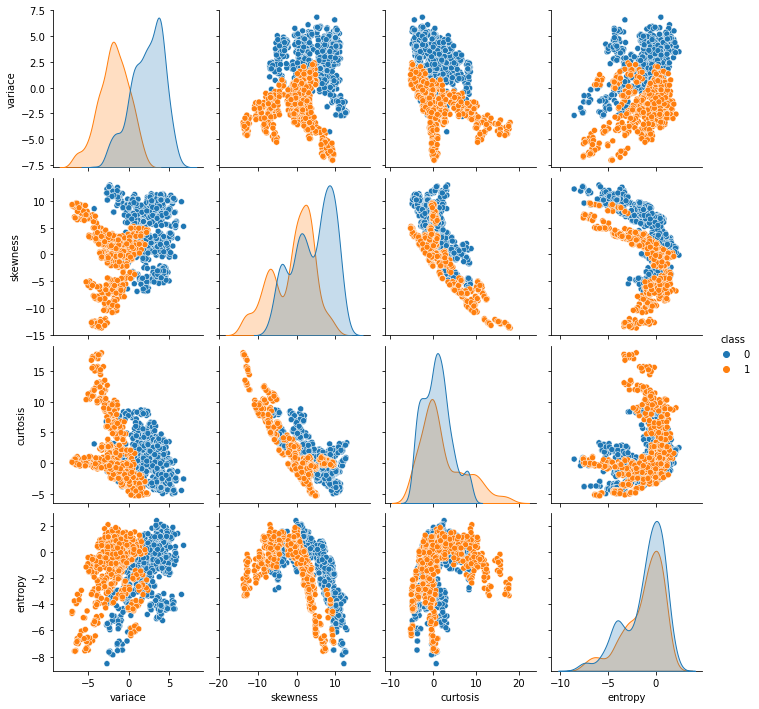

<IPython.core.display.Javascript object>

In [6]:
sns.pairplot(banknotes, hue="class")
plt.show()

There are certain features for which the classes can be easily classified.

### Creating a binary classification Neural Network 

In [7]:
from keras.models import Sequential
from keras.layers import Dense

<IPython.core.display.Javascript object>

In [8]:
model = Sequential()

<IPython.core.display.Javascript object>

In [9]:
model.add(
    Dense(5, input_shape=(4,), activation="relu")
)  # 4 input nodes and a hidden layer with 5 nodes

<IPython.core.display.Javascript object>

In [10]:
model.add(Dense(1, activation="sigmoid"))  # output layer with one node

<IPython.core.display.Javascript object>

In [11]:
model.compile(optimizer="sgd", loss="binary_crossentropy", metrics=["accuracy"])

<IPython.core.display.Javascript object>

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 25        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


<IPython.core.display.Javascript object>

In [13]:
from sklearn.model_selection import train_test_split

<IPython.core.display.Javascript object>

In [14]:
X = banknotes.drop("class", axis=1)
y = banknotes["class"]

<IPython.core.display.Javascript object>

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<IPython.core.display.Javascript object>

In [16]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
35/35 [==============================] - 0s 923us/step - loss: 2.7998 - accuracy: 0.3770
Epoch 2/20
35/35 [==============================] - 0s 903us/step - loss: 0.9571 - accuracy: 0.5549
Epoch 3/20
35/35 [==============================] - 0s 810us/step - loss: 0.4793 - accuracy: 0.7433
Epoch 4/20
35/35 [==============================] - 0s 839us/step - loss: 0.2866 - accuracy: 0.9906
Epoch 5/20
35/35 [==============================] - 0s 922us/step - loss: 0.2274 - accuracy: 0.9892
Epoch 6/20
35/35 [==============================] - 0s 829us/step - loss: 0.2018 - accuracy: 0.9791
Epoch 7/20
35/35 [==============================] - 0s 815us/step - loss: 0.1751 - accuracy: 0.9878
Epoch 8/20
35/35 [==============================] - 0s 946us/step - loss: 0.1559 - accuracy: 0.9848
Epoch 9/20
35/35 [==============================] - 0s 820us/step - loss: 0.1354 - accuracy: 0.9842
Epoch 10/20
35/35 [==============================] - 0s 834us/step - loss: 0.1173 - accuracy: 0.9878

<IPython.core.display.Javascript object>

The accuracy increases with each epoch as the weights are adjusted due to back-propagation.

In [17]:
accuracy = model.evaluate(X_test, y_test)[1]
print("The model accuracy is {:.4f}".format(accuracy))

9/9 [==============================] - 0s 998us/step - loss: 0.1001 - accuracy: 0.9818
The model accuracy is 0.9818


<IPython.core.display.Javascript object>

This simple model has an accuracy of more than 90%. This model can be improved by checking for over-fitting by using cross-validation, regularization techniques etc.